In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Plot.BodeDiagram import bode_diagram
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

In [38]:
circuit1 = Circuit('Twin-T Notch Filter')

r = 2.653@u_kΩ
c = 1@u_uF

r1 = r
r2 = r
r3 = r/2.0
c1 = c
c2 = c
c3 = 2.0*c

r4 = 10.0*r
r5 = 10.0*r
r6 = 5.0*r
c4 = c/10.0
c5 = c/10.0
c6 = c/5.0
                   
circuit1.SinusoidalVoltageSource('input', 'in', circuit1.gnd, amplitude=1@u_V)
# Q = .5
circuit1.R(1, 'in', 1, r1)
circuit1.R(2, 1, 'out5', r2)
circuit1.R(3, 2, circuit1.gnd, r3)
circuit1.C(1, 1, circuit1.gnd, c3)
circuit1.C(2, 'in', 2, c1)
circuit1.C(3, 'out5', 2, c2)                  
# copy
circuit1.R(4, 'in', 3, r4)
circuit1.R(5, 3, 'out1', r5)
circuit1.R(6, 4, circuit1.gnd, r6)
circuit1.C(4, 3, circuit1.gnd, c6)
circuit1.C(5, 'in', 4, c4)
circuit1.C(6, 'out1', 4, c5)              

2020-12-13 12:29:41,742 - PySpice.Spice.Netlist.Node.__init__ - WARNING - Node name 'in' is a Python keyword


Capacitor C6

In [39]:
simulator1 = circuit1.simulator(temperature=25, nominal_temperature=25)
analysis1 = simulator1.ac(start_frequency=10@u_Hz, stop_frequency=1@u_kHz, number_of_points=100,  variation='dec')

In [40]:
resonant_frequency = 1 / (2 * math.pi * r * c)
#quality_factor = 1 / R4.resistance * math.sqrt(inductance / capacitance)
print("Resonant frequency = {:.1f} Hz".format(resonant_frequency))
#print("Factor of quality = {:.1f}".format(quality_factor))

Resonant frequency = 60.0 Hz


2020-12-13 12:29:46,029 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-13 12:29:46,030 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-13 12:29:46,038 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-13 12:29:46,038 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less


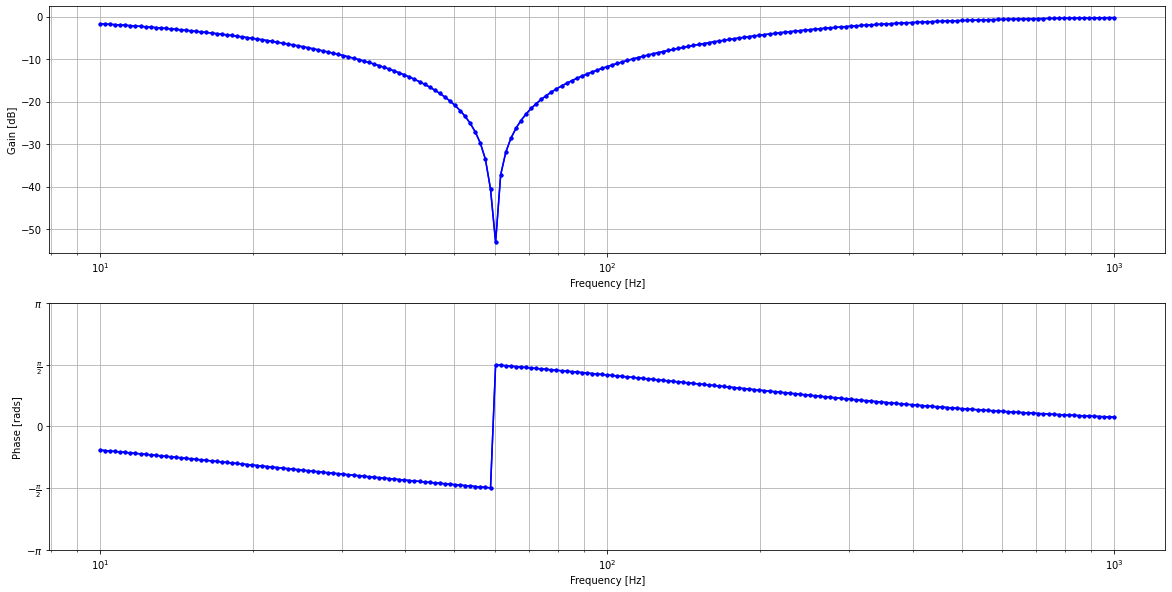

In [41]:
figure = plt.figure(1, (20, 10))
plt.title("Bode Diagrams of RLC Filters")
axes = (plt.subplot(211), plt.subplot(212))
for out in ('out5', 'out1'):
    bode_diagram(axes=axes,
                 frequency=analysis1.frequency,
                 gain=20*np.log10(np.absolute(analysis1[out])),
                 phase=np.angle(analysis1[out], deg=False),
                 marker='.',
                 color='blue',
                 linestyle='-',
    )
#for axe in axes:
#    axe.axvline(x=resonant_frequency, color='red')